### 2020/08/04
- （p値が同じかどうか（必要ない、サンプルが異なるから））
- 選択される特徴量が同じかどうか（ランキングを付けた際に同じ特徴量が選ばれているか）
- サンプル数...to_qubo10_p, to_bqm10_p:100で、enu10_pは210
- (結果)最小のpを持つ特徴量は3つの手法どれでも同じだった。
- (結果)各p値やA以外のp値の順番は異なることもあった

### 2020/08/18
- mushroom_lデータを更新してt^0を出した

In [105]:
import pandas as pd 
import numpy as np

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

In [107]:
#比較対象
enu10_p = pd.read_csv("../output/10bit/enu10_p.csv", sep=',', index_col=0)
enul_p = pd.read_csv("../output/mushrooml/enul_p.csv", sep=',', index_col=0)

In [108]:
enul_p

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,1.0,0.000078,0.97972,0.233333,1.0,0.715385,0.304196,1.0,0.715385,0.940559,...,1.0,0.5,0.842657,0.9,0.5,0.304196,0.766667,1.0,0.9,1.0


In [114]:
#enul_pにおける各列の最大値
enul_p.idxmin(axis=1) #1です

0    1
dtype: object

In [115]:
enul_p.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '108', '109', '110', '111', '112', '113', '114', '115', '116', '117'],
      dtype='object', length=118)

---------
-------

## 各試行10回ずつ

In [116]:
#X軸
numreads_10 = np.logspace(1, 4, num=4, base=10, dtype=int)
numreads_5 = [ll*100 for ll in range(1, 21) if ll%5==0 or ll==1]

### 16bit, using mushroom dataset

#### t^0のみ

In [117]:
#10回分
to_qubol_samples_p_10time = {}
to_qubol_samples_p_10time['10'] = pd.read_csv("../output/mushrooml/to_qubol_10samples_p_10time.csv", sep=',', index_col=0)
to_qubol_samples_p_10time['100'] = pd.read_csv("../output/mushrooml/to_qubol_100samples_p_10time.csv", sep=',', index_col=0)
to_qubol_samples_p_10time['500'] = pd.read_csv("../output/mushrooml/to_qubol_500samples_p_10time.csv", sep=',', index_col=0)
to_qubol_samples_p_10time['1000'] = pd.read_csv("../output/mushrooml/to_qubol_1000samples_p_10time.csv", sep=',', index_col=0)
to_qubol_samples_p_10time['1500'] = pd.read_csv("../output/mushrooml/to_qubol_1500samples_p_10time.csv", sep=',', index_col=0)
to_qubol_samples_p_10time['2000'] = pd.read_csv("../output/mushrooml/to_qubol_2000samples_p_10time.csv", sep=',', index_col=0)
to_qubol_samples_p_10time['10000'] = pd.read_csv("../output/mushrooml/to_qubol_10000samples_p_10time.csv", sep=',', index_col=0)

[0.0, 0.0, 0.0001, 6.0012002600600136e-05]


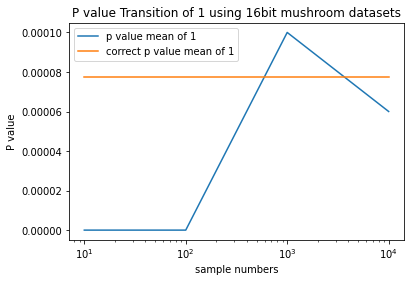

In [119]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_10times_lg_mean_list = []
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['10']['1'].mean())
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['100']['1'].mean())
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['1000']['1'].mean())
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['10000']['1'].mean())
print(qubol_10times_lg_mean_list)

plt.plot(numreads_10, qubol_10times_lg_mean_list, label='p value mean of 1')
plt.plot(numreads_10, [enul_p['1']]*4, label='correct p value mean of 1')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('P value')
plt.legend()

fig.savefig('../output/mushrooml/t0_10_10000_meanP.png')

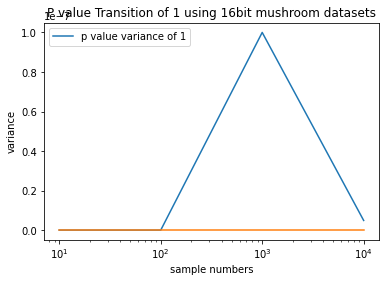

In [120]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_10times_lg_var_list = []
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['10']['1'].var())
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['100']['1'].var())
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['1000']['1'].var())
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['10000']['1'].var())

plt.plot(numreads_10, qubol_10times_lg_var_list, label='p value variance of 1')
plt.plot(numreads_10, [0]*4)

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('variance')
plt.legend()

fig.savefig('../output/mushrooml/t0_10_10000_varP.png')

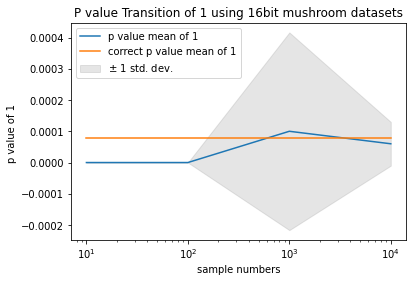

In [122]:
# 画像のプロット先の準備
fig = plt.figure()

# mean±std1
qubol_10times_lg_std_list = [ii**0.5 for ii in qubol_10times_lg_var_list]
qubol_10times_lg_lower = (np.array(qubol_10times_lg_mean_list) + np.array(qubol_10times_lg_std_list)).tolist()
qubol_10times_lg_upper = (np.array(qubol_10times_lg_mean_list) - np.array(qubol_10times_lg_std_list)).tolist()
plt.fill_between(numreads_10, qubol_10times_lg_lower, qubol_10times_lg_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# mean
plt.plot(numreads_10, qubol_10times_lg_mean_list, label='p value mean of 1')

# 本当の値
plt.plot(numreads_10, [enul_p['1']]*4, label='correct p value mean of 1')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 1 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_10_10000_P.png')

[0.0, 0.0, 0.0001, 0.00013337780742717366, 0.00010002501250625312]


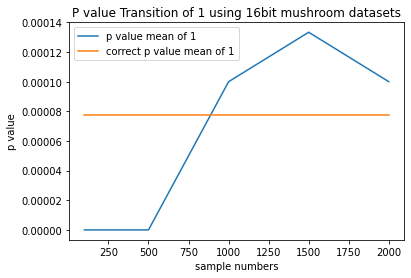

In [123]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_10times_5_mean_list = []
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['100']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['500']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['1000']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['1500']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['2000']['1'].mean())
print(qubol_10times_5_mean_list)

plt.plot(numreads_5, qubol_10times_5_mean_list, label='p value mean of 1')
plt.plot(numreads_5, [enul_p['1']]*5, label='correct p value mean of 1')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value')
plt.legend()

fig.savefig('../output/mushrooml/t0_100_2000_meanP.png')

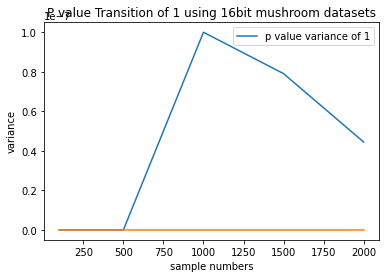

In [124]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_10times_5_var_list = []
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['100']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['500']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['1000']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['1500']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['2000']['1'].var())

plt.plot(numreads_5, qubol_10times_5_var_list, label='p value variance of 1')
plt.plot(numreads_5, [0]*5)

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('variance')
plt.legend()

fig.savefig('../output/mushrooml/t0_100_2000_varP.png')

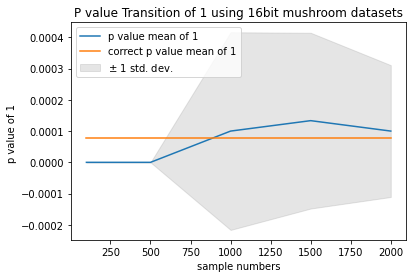

In [126]:
# 画像のプロット先の準備
fig = plt.figure()

# mean±std1
qubol_10times_5_std_list = [ii**0.5 for ii in qubol_10times_5_var_list]
qubol_10times_5_lower = (np.array(qubol_10times_5_mean_list) + np.array(qubol_10times_5_std_list)).tolist()
qubol_10times_5_upper = (np.array(qubol_10times_5_mean_list) - np.array(qubol_10times_5_std_list)).tolist()
plt.fill_between(numreads_5, qubol_10times_5_lower, qubol_10times_5_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')


# mean
plt.plot(numreads_5, qubol_10times_5_mean_list, label='p value mean of 1')

# 本当の値
plt.plot(numreads_5, [enul_p['1']]*5, label='correct p value mean of 1')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 1 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_100_2000_P.png')

---------------------

#### t^0, t^1

In [ ]:
#10回分
t0t1_qubol_samples_p_10time = {}
t0t1_qubol_samples_p_10time['10'] = pd.read_csv("../output/mushrooml/to_qubol_10samples_p_10time.csv", sep=',', index_col=0)
t0t1_qubol_samples_p_10time['100'] = pd.read_csv("../output/mushrooml/to_qubol_100samples_p_10time.csv", sep=',', index_col=0)
t0t1_qubol_samples_p_10time['500'] = pd.read_csv("../output/mushrooml/to_qubol_500samples_p_10time.csv", sep=',', index_col=0)
t0t1_qubol_samples_p_10time['1000'] = pd.read_csv("../output/mushrooml/to_qubol_1000samples_p_10time.csv", sep=',', index_col=0)
t0t1_qubol_samples_p_10time['1500'] = pd.read_csv("../output/mushrooml/to_qubol_1500samples_p_10time.csv", sep=',', index_col=0)
t0t1_qubol_samples_p_10time['2000'] = pd.read_csv("../output/mushrooml/to_qubol_2000samples_p_10time.csv", sep=',', index_col=0)
t0t1_qubol_samples_p_10time['10000'] = pd.read_csv("../output/mushrooml/to_qubol_10000samples_p_10time.csv", sep=',', index_col=0)

In [ ]:
# 画像のプロット先の準備
fig = plt.figure()

#mean
qubol_10times_lg_mean_list = []
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['10']['1'].mean())
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['100']['1'].mean())
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['1000']['1'].mean())
qubol_10times_lg_mean_list.append(to_qubol_samples_p_10time['10000']['1'].mean())

#var
qubol_10times_lg_var_list = []
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['10']['1'].var())
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['100']['1'].var())
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['1000']['1'].var())
qubol_10times_lg_var_list.append(to_qubol_samples_p_10time['10000']['1'].var())

# mean±std1
qubol_10times_lg_std_list = [ii**0.5 for ii in qubol_10times_lg_var_list]
qubol_10times_lg_lower = (np.array(qubol_10times_lg_mean_list) + np.array(qubol_10times_lg_std_list)).tolist()
qubol_10times_lg_upper = (np.array(qubol_10times_lg_mean_list) - np.array(qubol_10times_lg_std_list)).tolist()
plt.fill_between(numreads_10, qubol_10times_lg_lower, qubol_10times_lg_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# mean
plt.plot(numreads_10, qubol_10times_lg_mean_list, label='p value mean of 1')

# 本当の値
plt.plot(numreads_10, [enul_p['1']]*4, label='correct p value mean of 1')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 1 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_10_10000_P.png')

In [ ]:
# 画像のプロット先の準備
fig = plt.figure()

#mean
qubol_10times_5_mean_list = []
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['100']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['500']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['1000']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['1500']['1'].mean())
qubol_10times_5_mean_list.append(to_qubol_samples_p_10time['2000']['1'].mean())

#var
qubol_10times_5_var_list = []
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['100']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['500']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['1000']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['1500']['1'].var())
qubol_10times_5_var_list.append(to_qubol_samples_p_10time['2000']['1'].var())

# mean±std1
qubol_10times_5_std_list = [ii**0.5 for ii in qubol_10times_5_var_list]
qubol_10times_5_lower = (np.array(qubol_10times_5_mean_list) + np.array(qubol_10times_5_std_list)).tolist()
qubol_10times_5_upper = (np.array(qubol_10times_5_mean_list) - np.array(qubol_10times_5_std_list)).tolist()
plt.fill_between(numreads_5, qubol_10times_5_lower, qubol_10times_5_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')


# mean
plt.plot(numreads_5, qubol_10times_5_mean_list, label='p value mean of 1')

# 本当の値
plt.plot(numreads_5, [enul_p['1']]*5, label='correct p value mean of 1')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 1 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_100_2000_P.png')

-------
------------

### 10bit, using original datasets

In [52]:
#10回分
to_qubo10_10samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_10samples_p_10time.csv", sep=',', index_col=0)
to_qubo10_100samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_100samples_p_10time.csv", sep=',', index_col=0)
to_qubo10_500samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_500samples_p_10time.csv", sep=',', index_col=0)
to_qubo10_1000samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_1000samples_p_10time.csv", sep=',', index_col=0)
to_qubo10_1500samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_1500samples_p_10time.csv", sep=',', index_col=0)
to_qubo10_2000samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_2000samples_p_10time.csv", sep=',', index_col=0)
to_qubo10_10000samples_p_10time = pd.read_csv("../output/10bit/to_qubo10_10000samples_p_10time.csv", sep=',', index_col=0)

Text(0, 0.5, 'p value mean of A ')

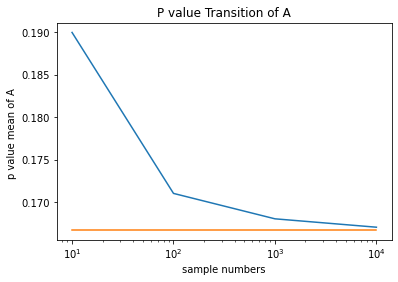

In [53]:
#y軸
A_qubo_10times_lg_mean_list = []
A_qubo_10times_lg_mean_list.append(to_qubo10_10samples_p_10time['A'].mean())
A_qubo_10times_lg_mean_list.append(to_qubo10_100samples_p_10time['A'].mean())
A_qubo_10times_lg_mean_list.append(to_qubo10_1000samples_p_10time['A'].mean())
A_qubo_10times_lg_mean_list.append(to_qubo10_10000samples_p_10time['A'].mean())

plt.plot(numreads_10, A_qubo_10times_lg_mean_list)
plt.plot(numreads_10, [enu10_p['A']]*4)

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of A')
plt.xlabel('sample numbers')
plt.ylabel('p value mean of A ')

Text(0, 0.5, 'p value variance of A ')

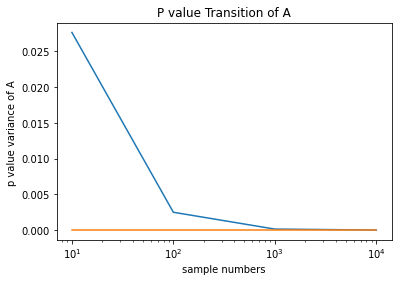

In [54]:
#y軸
A_qubo_10times_lg_var_list = []
A_qubo_10times_lg_var_list.append(to_qubo10_10samples_p_10time['A'].var())
A_qubo_10times_lg_var_list.append(to_qubo10_100samples_p_10time['A'].var())
A_qubo_10times_lg_var_list.append(to_qubo10_1000samples_p_10time['A'].var())
A_qubo_10times_lg_var_list.append(to_qubo10_10000samples_p_10time['A'].var())

plt.plot(numreads_10, A_qubo_10times_lg_var_list)
plt.plot(numreads_10, [0]*4)

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of A')
plt.xlabel('sample numbers')
plt.ylabel('p value variance of A ')

---------------------------------------------

Text(0, 0.5, 'p value mean of A ')

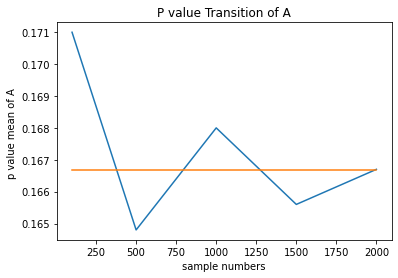

In [55]:
#y軸
A_qubo_10times_5_mean_list = []
A_qubo_10times_5_mean_list.append(to_qubo10_100samples_p_10time['A'].mean())
A_qubo_10times_5_mean_list.append(to_qubo10_500samples_p_10time['A'].mean())
A_qubo_10times_5_mean_list.append(to_qubo10_1000samples_p_10time['A'].mean())
A_qubo_10times_5_mean_list.append(to_qubo10_1500samples_p_10time['A'].mean())
A_qubo_10times_5_mean_list.append(to_qubo10_2000samples_p_10time['A'].mean())

plt.plot(numreads_5, A_qubo_10times_5_mean_list)
plt.plot(numreads_5, [enu10_p['A']]*5)

plt.title('P value Transition of A')
plt.xlabel('sample numbers')
plt.ylabel('p value mean of A ')

Text(0, 0.5, 'p value variance of A ')

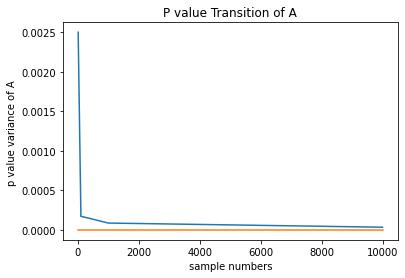

In [56]:
#y軸
A_qubo_10times_5_var_list = []
A_qubo_10times_5_var_list.append(to_qubo10_100samples_p_10time['A'].var())
A_qubo_10times_5_var_list.append(to_qubo10_500samples_p_10time['A'].var())
A_qubo_10times_5_var_list.append(to_qubo10_1500samples_p_10time['A'].var())
A_qubo_10times_5_var_list.append(to_qubo10_2000samples_p_10time['A'].var())

plt.plot(numreads_10, A_qubo_10times_5_var_list)
plt.plot(numreads_10, [0]*4)

plt.title('P value Transition of A')
plt.xlabel('sample numbers')
plt.ylabel('p value variance of A ')

## 各試行1回ずつ

In [2]:
#100
to_qubo10_100samples_p = pd.read_csv("../output/to_qubo10_100samples_p.csv", sep=',', index_col=0)
to_bqm10_100samples_p = pd.read_csv("../output/to_bqm10_100samples_p.csv", sep=',', index_col=0)

#200
to_qubo10_200samples_p = pd.read_csv("../output/to_qubo10_200samples_p.csv", sep=',', index_col=0)
to_bqm10_200samples_p = pd.read_csv("../output/to_bqm10_200samples_p.csv", sep=',', index_col=0)

#210
enu10_p = pd.read_csv("../output/enu10_p.csv", sep=',', index_col=0)
to_qubo10_210samples_p = pd.read_csv("../output/to_qubo10_210samples_p.csv", sep=',', index_col=0)
to_bqm10_210samples_p = pd.read_csv("../output/to_bqm10_210samples_p.csv", sep=',', index_col=0)

#300
to_qubo10_300samples_p = pd.read_csv("../output/to_qubo10_300samples_p.csv", sep=',', index_col=0)
to_bqm10_300samples_p = pd.read_csv("../output/to_bqm10_300samples_p.csv", sep=',', index_col=0)

#400
to_qubo10_400samples_p = pd.read_csv("../output/to_qubo10_400samples_p.csv", sep=',', index_col=0)
to_bqm10_400samples_p = pd.read_csv("../output/to_bqm10_400samples_p.csv", sep=',', index_col=0)

#500
to_qubo10_500samples_p = pd.read_csv("../output/to_qubo10_500samples_p.csv", sep=',', index_col=0)
to_bqm10_500samples_p = pd.read_csv("../output/to_bqm10_500samples_p.csv", sep=',', index_col=0)

#600
to_qubo10_600samples_p = pd.read_csv("../output/to_qubo10_600samples_p.csv", sep=',', index_col=0)
to_bqm10_600samples_p = pd.read_csv("../output/to_bqm10_600samples_p.csv", sep=',', index_col=0)

#700
to_qubo10_700samples_p = pd.read_csv("../output/to_qubo10_700samples_p.csv", sep=',', index_col=0)
to_bqm10_700samples_p = pd.read_csv("../output/to_bqm10_700samples_p.csv", sep=',', index_col=0)

#800
to_qubo10_800samples_p = pd.read_csv("../output/to_qubo10_800samples_p.csv", sep=',', index_col=0)
to_bqm10_800samples_p = pd.read_csv("../output/to_bqm10_800samples_p.csv", sep=',', index_col=0)

#900
to_qubo10_900samples_p = pd.read_csv("../output/to_qubo10_900samples_p.csv", sep=',', index_col=0)
to_bqm10_900samples_p = pd.read_csv("../output/to_bqm10_900samples_p.csv", sep=',', index_col=0)

In [299]:
enu10_p

,A,B,C,D,E,F,G,H,I,J
0,0.166667,0.880952,0.452381,0.452381,0.547619,0.738095,0.738095,0.995238,0.966667,1.0


In [300]:
to_qubo10_210samples_p

,A,B,C,D,E,F,G,H,I,J
0,0.152381,0.838095,0.414286,0.361905,0.519048,0.733333,0.733333,0.990476,0.971429,1.0


In [301]:
to_bqm10_210samples_p

,A,B,C,D,E,F,G,H,I,J
0,0.138095,0.885714,0.466667,0.466667,0.52381,0.671429,0.752381,1.0,0.961905,1.0


### 210サンプル分で比較
- 全列挙は210サンプルあるが、他の２つはSAによって出力されているので210サンプルすべて異なるとは限らない。
- bqm, quboを使った関数はどちらも同じ結果を出す（理想的）。

In [302]:
#基準数値
enu10_p_dic = enu10_p.T.to_dict()
sorted_enu10_p_list = sorted(enu10_p_dic[0].items(), key=lambda x:x[1])
sorted_enu10_p_list

[('A', 0.16666666666666666),
 ('C', 0.4523809523809524),
 ('D', 0.4523809523809524),
 ('E', 0.5476190476190477),
 ('F', 0.7380952380952381),
 ('G', 0.7380952380952381),
 ('B', 0.8809523809523809),
 ('I', 0.9666666666666668),
 ('H', 0.9952380952380953),
 ('J', 1.0)]

In [303]:
to_qubo10_210samples_p_dic = to_qubo10_210samples_p.T.to_dict()
sorted_to_qubo10_210samples_p_list = sorted(to_qubo10_210samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_210samples_p_list

[('A', 0.1523809523809524),
 ('D', 0.3619047619047619),
 ('C', 0.4142857142857143),
 ('E', 0.5190476190476191),
 ('F', 0.7333333333333333),
 ('G', 0.7333333333333333),
 ('B', 0.8380952380952381),
 ('I', 0.9714285714285714),
 ('H', 0.9904761904761904),
 ('J', 1.0)]

In [304]:
to_bqm10_210samples_p_dic = to_bqm10_210samples_p.T.to_dict()
sorted_to_bqm10_210samples_p_list = sorted(to_bqm10_210samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_210samples_p_list

[('A', 0.1380952380952381),
 ('C', 0.4666666666666667),
 ('D', 0.4666666666666667),
 ('E', 0.5238095238095238),
 ('F', 0.6714285714285714),
 ('G', 0.7523809523809524),
 ('B', 0.8857142857142857),
 ('I', 0.961904761904762),
 ('H', 1.0),
 ('J', 1.0)]

### サンプル数の増加とp値の変化
- qubo

In [305]:
#100
to_qubo10_100samples_p_dic = to_qubo10_100samples_p.T.to_dict()
sorted_to_qubo10_100samples_p_list = sorted(to_qubo10_100samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_100samples_p_list

[('A', 0.16),
 ('D', 0.42),
 ('C', 0.5),
 ('E', 0.59),
 ('G', 0.67),
 ('F', 0.74),
 ('B', 0.88),
 ('I', 0.99),
 ('H', 1.0),
 ('J', 1.0)]

In [306]:
#200
to_qubo10_200samples_p_dic = to_qubo10_200samples_p.T.to_dict()
sorted_to_qubo10_200samples_p_list = sorted(to_qubo10_200samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_200samples_p_list

[('A', 0.205),
 ('D', 0.485),
 ('C', 0.515),
 ('E', 0.575),
 ('G', 0.725),
 ('F', 0.735),
 ('B', 0.885),
 ('I', 0.965),
 ('H', 1.0),
 ('J', 1.0)]

In [307]:
#300
to_qubo10_300samples_p_dic = to_qubo10_300samples_p.T.to_dict()
sorted_to_qubo10_300samples_p_list = sorted(to_qubo10_300samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_300samples_p_list

[('A', 0.17333333333333334),
 ('C', 0.4166666666666667),
 ('D', 0.44666666666666666),
 ('E', 0.5466666666666666),
 ('F', 0.72),
 ('G', 0.7433333333333333),
 ('B', 0.9033333333333332),
 ('I', 0.97),
 ('H', 0.9966666666666668),
 ('J', 1.0)]

In [308]:
#400
to_qubo10_400samples_p_dic = to_qubo10_400samples_p.T.to_dict()
sorted_to_qubo10_400samples_p_list = sorted(to_qubo10_400samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_400samples_p_list

[('A', 0.1325),
 ('C', 0.4175),
 ('D', 0.47),
 ('E', 0.5225),
 ('F', 0.735),
 ('G', 0.74),
 ('B', 0.875),
 ('I', 0.9625),
 ('H', 0.9875),
 ('J', 1.0)]

In [309]:
#500
to_qubo10_500samples_p_dic = to_qubo10_500samples_p.T.to_dict()
sorted_to_qubo10_500samples_p_list = sorted(to_qubo10_500samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_500samples_p_list

[('A', 0.182),
 ('C', 0.428),
 ('D', 0.46),
 ('E', 0.56),
 ('G', 0.706),
 ('F', 0.7240000000000001),
 ('B', 0.898),
 ('I', 0.9620000000000001),
 ('H', 0.996),
 ('J', 1.0)]

In [310]:
#600
to_qubo10_600samples_p_dic = to_qubo10_600samples_p.T.to_dict()
sorted_to_qubo10_600samples_p_list = sorted(to_qubo10_600samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_600samples_p_list

[('A', 0.15833333333333333),
 ('C', 0.415),
 ('D', 0.43666666666666665),
 ('E', 0.5266666666666666),
 ('G', 0.7),
 ('F', 0.7483333333333333),
 ('B', 0.88),
 ('I', 0.975),
 ('H', 0.9983333333333332),
 ('J', 1.0)]

In [311]:
#700
to_qubo10_700samples_p_dic = to_qubo10_700samples_p.T.to_dict()
sorted_to_qubo10_700samples_p_list = sorted(to_qubo10_700samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_700samples_p_list

[('A', 0.15857142857142856),
 ('C', 0.45),
 ('D', 0.4585714285714286),
 ('E', 0.5471428571428572),
 ('F', 0.7485714285714286),
 ('G', 0.7485714285714286),
 ('B', 0.8857142857142857),
 ('I', 0.9614285714285714),
 ('H', 0.9971428571428572),
 ('J', 1.0)]

In [312]:
#800
to_qubo10_800samples_p_dic = to_qubo10_800samples_p.T.to_dict()
sorted_to_qubo10_800samples_p_list = sorted(to_qubo10_800samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_800samples_p_list

[('A', 0.1625),
 ('D', 0.42875),
 ('C', 0.4375),
 ('E', 0.54875),
 ('F', 0.73625),
 ('G', 0.76375),
 ('B', 0.87375),
 ('I', 0.96875),
 ('H', 1.0),
 ('J', 1.0)]

In [313]:
#900
to_qubo10_900samples_p_dic = to_qubo10_900samples_p.T.to_dict()
sorted_to_qubo10_900samples_p_list = sorted(to_qubo10_900samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_qubo10_900samples_p_list

[('A', 0.15888888888888889),
 ('C', 0.4455555555555555),
 ('D', 0.4488888888888889),
 ('E', 0.5344444444444445),
 ('F', 0.73),
 ('G', 0.7522222222222222),
 ('B', 0.8844444444444445),
 ('I', 0.9544444444444444),
 ('H', 0.9933333333333332),
 ('J', 1.0)]

- bqm

In [314]:
#100
to_bqm10_100samples_p_dic = to_bqm10_100samples_p.T.to_dict()
sorted_to_bqm10_100samples_p_list = sorted(to_bqm10_100samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_100samples_p_list

[('A', 0.18),
 ('C', 0.41),
 ('D', 0.46),
 ('E', 0.5),
 ('F', 0.68),
 ('G', 0.81),
 ('B', 0.91),
 ('I', 0.97),
 ('H', 0.99),
 ('J', 1.0)]

In [315]:
#200
to_bqm10_200samples_p_dic = to_bqm10_200samples_p.T.to_dict()
sorted_to_bqm10_200samples_p_list = sorted(to_bqm10_200samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_200samples_p_list

[('A', 0.175),
 ('D', 0.45),
 ('C', 0.48),
 ('E', 0.52),
 ('G', 0.74),
 ('F', 0.775),
 ('B', 0.85),
 ('H', 0.99),
 ('I', 0.99),
 ('J', 1.0)]

In [316]:
#300
to_bqm10_300samples_p_dic = to_bqm10_300samples_p.T.to_dict()
sorted_to_bqm10_300samples_p_list = sorted(to_bqm10_300samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_300samples_p_list

[('A', 0.15333333333333332),
 ('C', 0.43),
 ('D', 0.44333333333333336),
 ('E', 0.5533333333333333),
 ('G', 0.74),
 ('F', 0.7733333333333333),
 ('B', 0.9166666666666666),
 ('I', 0.9833333333333332),
 ('H', 0.9866666666666668),
 ('J', 1.0)]

In [317]:
#400
to_bqm10_400samples_p_dic = to_bqm10_400samples_p.T.to_dict()
sorted_to_bqm10_400samples_p_list = sorted(to_bqm10_400samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_400samples_p_list

[('A', 0.1675),
 ('C', 0.4375),
 ('D', 0.4825),
 ('E', 0.515),
 ('G', 0.7425),
 ('F', 0.76),
 ('B', 0.8525),
 ('I', 0.98),
 ('H', 0.995),
 ('J', 1.0)]

In [318]:
#500
to_bqm10_500samples_p_dic = to_bqm10_500samples_p.T.to_dict()
sorted_to_bqm10_500samples_p_list = sorted(to_bqm10_500samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_500samples_p_list

[('A', 0.172),
 ('C', 0.48),
 ('D', 0.48200000000000004),
 ('E', 0.556),
 ('G', 0.736),
 ('F', 0.752),
 ('B', 0.904),
 ('I', 0.972),
 ('H', 0.9940000000000001),
 ('J', 1.0)]

In [319]:
#600
to_bqm10_600samples_p_dic = to_bqm10_600samples_p.T.to_dict()
sorted_to_bqm10_600samples_p_list = sorted(to_bqm10_600samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_600samples_p_list

[('A', 0.16),
 ('C', 0.3933333333333333),
 ('D', 0.43333333333333335),
 ('E', 0.54),
 ('G', 0.7266666666666667),
 ('F', 0.7683333333333333),
 ('B', 0.8716666666666667),
 ('I', 0.9666666666666668),
 ('H', 0.9966666666666668),
 ('J', 1.0)]

In [320]:
#700
to_bqm10_700samples_p_dic = to_bqm10_700samples_p.T.to_dict()
sorted_to_bqm10_700samples_p_list = sorted(to_bqm10_700samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_700samples_p_list

[('A', 0.16428571428571428),
 ('D', 0.3971428571428571),
 ('C', 0.4228571428571429),
 ('E', 0.5414285714285715),
 ('G', 0.7214285714285714),
 ('F', 0.7442857142857143),
 ('B', 0.8714285714285714),
 ('I', 0.9757142857142858),
 ('H', 0.9957142857142856),
 ('J', 1.0)]

In [321]:
#800
to_bqm10_800samples_p_dic = to_bqm10_800samples_p.T.to_dict()
sorted_to_bqm10_800samples_p_list = sorted(to_bqm10_800samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_800samples_p_list

[('A', 0.18),
 ('D', 0.4625),
 ('C', 0.4925),
 ('E', 0.56875),
 ('F', 0.7025),
 ('G', 0.76375),
 ('B', 0.9),
 ('I', 0.9625),
 ('H', 0.99375),
 ('J', 1.0)]

In [323]:
#900
to_bqm10_900samples_p_dic = to_bqm10_900samples_p.T.to_dict()
sorted_to_bqm10_900samples_p_list = sorted(to_bqm10_900samples_p_dic[0].items(), key=lambda x:x[1])
sorted_to_bqm10_900samples_p_list

[('A', 0.1688888888888889),
 ('C', 0.4488888888888889),
 ('D', 0.4588888888888889),
 ('E', 0.5711111111111111),
 ('G', 0.7255555555555555),
 ('F', 0.7444444444444445),
 ('B', 0.8822222222222222),
 ('I', 0.9577777777777776),
 ('H', 0.9944444444444444),
 ('J', 1.0)]

### Aのp値変遷
- nealのSAを使った方法、一つは使えそう。

In [10]:
import matplotlib.pyplot as plt
int_int = 10
hundred_list = [l*100 for l in range(1, int_int+1)]
hundred_list

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

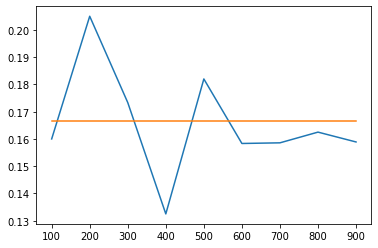

In [325]:
A_qubo_list = []
A_qubo_list.append(to_qubo10_100samples_p['A'])
A_qubo_list.append(to_qubo10_200samples_p['A'])
A_qubo_list.append(to_qubo10_300samples_p['A'])
A_qubo_list.append(to_qubo10_400samples_p['A'])
A_qubo_list.append(to_qubo10_500samples_p['A'])
A_qubo_list.append(to_qubo10_600samples_p['A'])
A_qubo_list.append(to_qubo10_700samples_p['A'])
A_qubo_list.append(to_qubo10_800samples_p['A'])
A_qubo_list.append(to_qubo10_900samples_p['A'])

plt.plot(hundred_list, A_qubo_list)
plt.plot(hundred_list, [enu10_p['A']]*int_int)

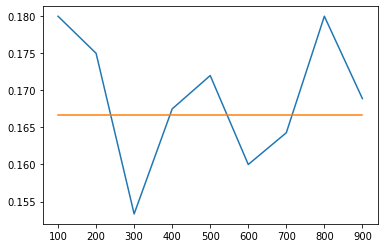

In [326]:
A_bqm_list = []
A_bqm_list.append(to_bqm10_100samples_p['A'])
A_bqm_list.append(to_bqm10_200samples_p['A'])
A_bqm_list.append(to_bqm10_300samples_p['A'])
A_bqm_list.append(to_bqm10_400samples_p['A'])
A_bqm_list.append(to_bqm10_500samples_p['A'])
A_bqm_list.append(to_bqm10_600samples_p['A'])
A_bqm_list.append(to_bqm10_700samples_p['A'])
A_bqm_list.append(to_bqm10_800samples_p['A'])
A_bqm_list.append(to_bqm10_900samples_p['A'])
    
plt.plot(hundred_list, A_bqm_list)
plt.plot(hundred_list, [enu10_p['A']]*int_int)